# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras

## Data Preprocessing

### Training Image preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18345 files belonging to 10 classes.


### Validation Image Preprocessing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4585 files belonging to 10 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[121.25 110.25 118.25]
   [116.   105.   113.  ]
   [128.25 117.25 125.25]
   ...
   [114.   100.   100.  ]
   [100.75  86.75  86.75]
   [112.5   98.5   98.5 ]]

  [[117.5  106.5  114.5 ]
   [126.5  115.5  123.5 ]
   [122.75 111.75 119.75]
   ...
   [116.5  102.5  102.5 ]
   [117.75 103.75 103.75]
   [107.25  93.25  93.25]]

  [[126.75 115.75 123.75]
   [120.25 109.25 117.25]
   [124.25 113.25 121.25]
   ...
   [116.25 101.25 104.25]
   [114.5   99.5  102.5 ]
   [107.25  92.25  95.25]]

  ...

  [[145.75 139.75 149.75]
   [154.75 148.75 158.75]
   [156.   150.   160.  ]
   ...
   [162.25 154.25 165.25]
   [160.   152.   163.  ]
   [154.   146.   157.  ]]

  [[150.25 144.25 154.25]
   [150.25 144.25 154.25]
   [158.   152.   162.  ]
   ...
   [149.25 141.25 152.25]
   [159.5  151.5  162.5 ]
   [158.75 150.75 161.75]]

  [[152.5  146.5  156.5 ]
   [157.75 151.75 161.75]
   [156.25 150.25 160.25]
   ...
   [152.25 144.25 155.25]
   [147.5  139.5  150.5 ]
   [147.75 139.75 15

## Building Model

In [22]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Input,Flatten,Dropout
from keras.models import Sequential

In [24]:
model = Sequential()

In [26]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [28]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [30]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [32]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [36]:
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())

In [40]:
model.add(Dense(units=1500,activation='relu'))

In [42]:
model.add(Dropout(0.4))

In [44]:
#Output Layer
model.add(Dense(units=10,activation='softmax'))

### Compiling and Training Phase

In [47]:
!pip install tf_keras
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

### Training Model

In [54]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 362s 625ms/step - accuracy: 0.3490 - loss: 1.8109 - val_accuracy: 0.7237 - val_loss: 0.7935
Epoch 2/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 347s 604ms/step - accuracy: 0.7837 - loss: 0.6259 - val_accuracy: 0.8517 - val_loss: 0.4082
Epoch 3/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 360s 628ms/step - accuracy: 0.8638 - loss: 0.4009 - val_accuracy: 0.8866 - val_loss: 0.3325
Epoch 4/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 358s 624ms/step - accuracy: 0.9030 - loss: 0.2816 - val_accuracy: 0.9147 - val_loss: 0.2503
Epoch 5/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 364s 635ms/step - accuracy: 0.9250 - loss: 0.2130 - val_accuracy: 0.9293 - val_loss: 0.2212
Epoch 6/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 348s 607ms/step - accuracy: 0.9377 - loss: 0.1812 - val_accuracy: 0.9514 - val_loss: 0.1474
Epoch 7/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 344s 600ms/step - accuracy: 0.9462 - loss: 0.1524 - val_accuracy: 0.9533 - val_loss: 0.1372
Epoch 8/15
574/574 ━━━━━━━━━━━━━━━━━━━━ 345s 601ms/step - accuracy: 0.9669 -

## Evaluating Model

In [57]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

574/574 ━━━━━━━━━━━━━━━━━━━━ 90s 157ms/step - accuracy: 0.9921 - loss: 0.0233
Training accuracy: 0.9926955699920654


In [59]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

144/144 ━━━━━━━━━━━━━━━━━━━━ 22s 155ms/step - accuracy: 0.9530 - loss: 0.1473
Validation accuracy: 0.9576880931854248


### Saving Model

In [61]:
model.save('trained_plant_disease_model.keras')

In [64]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5344780683517456,
  0.8135186433792114,
  0.8762060403823853,
  0.9105478525161743,
  0.9300081729888916,
  0.9495230317115784,
  0.9505587220191956,
  0.9642409086227417,
  0.966421365737915,
  0.9736713171005249,
  0.9761788249015808,
  0.9772689938545227,
  0.9778141379356384,
  0.9826110601425171,
  0.985500156879425],
 'loss': [1.3028424978256226,
  0.5361123085021973,
  0.35515910387039185,
  0.2603156566619873,
  0.19845318794250488,
  0.15128707885742188,
  0.14389199018478394,
  0.10769560933113098,
  0.09410285204648972,
  0.07795295864343643,
  0.06838387995958328,
  0.0665503442287445,
  0.06560438871383667,
  0.05290794372558594,
  0.047512538731098175],
 'val_accuracy': [0.7236641049385071,
  0.8516902923583984,
  0.8865866661071777,
  0.9147219061851501,
  0.9293347597122192,
  0.9513631463050842,
  0.9533260464668274,
  0.9524536728858948,
  0.9391493797302246,
  0.9535441398620605,
  0.956161379814148,
  0.9494002461433411,
  0.941766619682312,
  0.9589

In [66]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [68]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

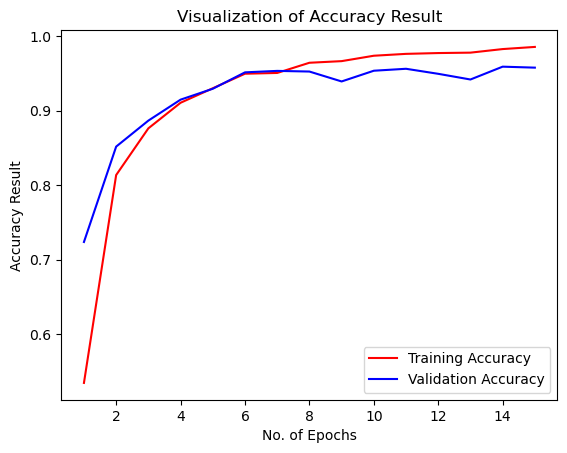

In [71]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [75]:
class_name = validation_set.class_names

In [77]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4585 files belonging to 10 classes.


In [80]:
y_pred = model.predict(test_set)
y_pred.shape
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

4585/4585 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step


<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [81]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [84]:
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [86]:
predicted_categories

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [89]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(10, 10)

In [90]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.98      0.96       425
                        Tomato___Early_blight       0.93      0.92      0.93       480
                         Tomato___Late_blight       0.94      0.97      0.95       463
                           Tomato___Leaf_Mold       0.98      0.98      0.98       470
                  Tomato___Septoria_leaf_spot       0.95      0.91      0.93       436
Tomato___Spider_mites Two-spotted_spider_mite       0.96      0.97      0.96       435
                         Tomato___Target_Spot       0.94      0.90      0.92       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.98      0.98       490
                 Tomato___Tomato_mosaic_virus       0.98      0.99      0.98       448
                             Tomato___healthy       0.97      0.98      0.98       481

                                     accu

### Confusion Matrix Visualization

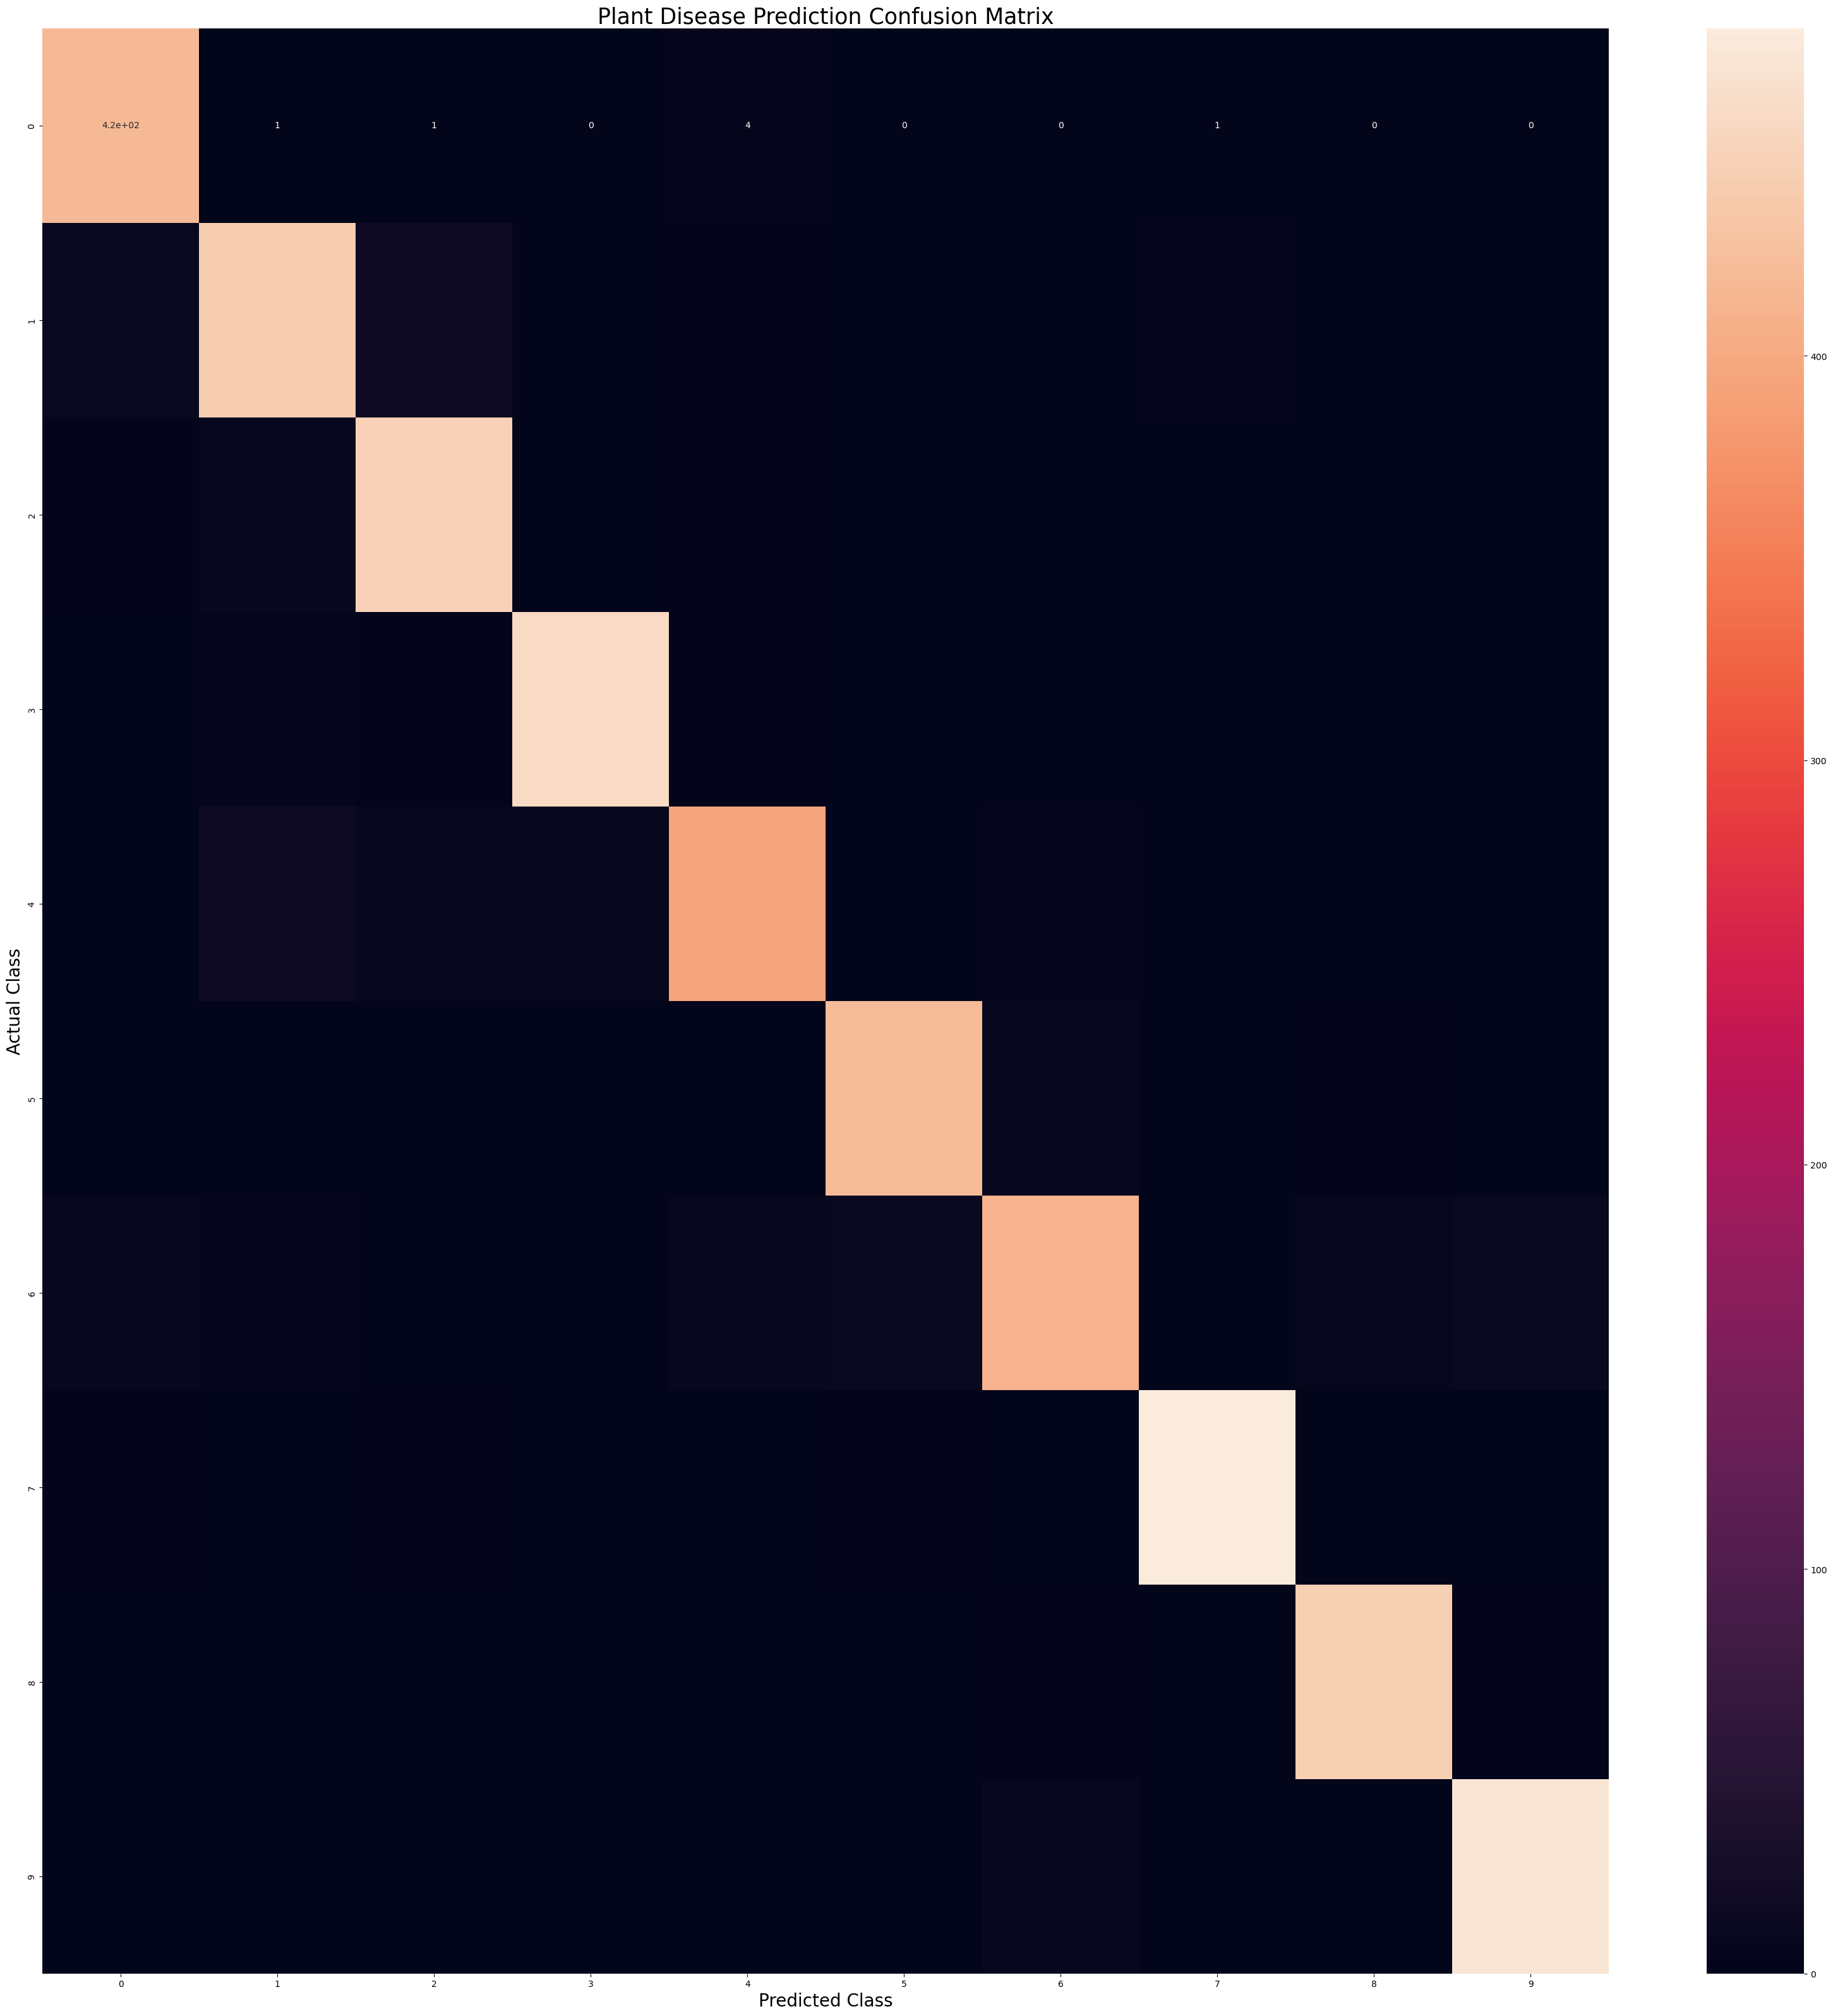

In [95]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
-